In [1]:
import pandas as pd
import numpy as np
import csv 
import string
import nltk 
import re 
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import sys
import warnings
from os import path
import ast
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, average_precision_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import jaccard_score
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
#from sklearn.model_selection import LeaveOneOut
#from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from skmultilearn.adapt import BRkNNaClassifier
from sklearn.linear_model import RidgeClassifierCV

# conf limites values
# min <= max
# ex: (1,1)
# (1,4)
configurationTFIDF=(4,4)


# num of features commom values:
# 25, 50, 100, 500, 1000, 5000
num_feature=5000

# size of test set
# commom values : 0.20, 0.30, 0.40.
size_test=0.30

#Stop Word
stop_word = "Yes"

#types permitted:
#RandomForest
#RidgeClassifierCV
#GaussianNB
#LinearSVC
#DecisionTree
#LogisticRegression
#MLPClassifier
#BRkNNaClassifier
#MLkNN
test_type = "RandomForest"
#https://xang1234.github.io/multi-label`
# file pattern + str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+

#defining paths
BodyTitle = './experiment/aprioriBodyTitle.csv'
loggingFile = './experiment/TitleBody3GramTFIDF.txt'
binaryBodyTitle = './experiment/binaryBodyTitle.csv'
pandaImage =  './experiment/panda.jpg'
multilabel_classes = './experiment/PRClassesNoBlankSpaces.csv'
report = './experiment/report.csv'
reportText = './experiment/report.txt'
template = './experiment/dfTeste.csv'

tfIDFoutputFile = './experiment/tfIDFoutputFile'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
classifierFeatureInput='./experiment/train_file_test'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
termFrequencyTop50 = './experiment/termFrequencyTop50'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
predictions_result = './experiment/predict_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
probabilities_result = './experiment/probability_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
modelMatrix = './experiment/modelMatrix'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
metrics_by_class = './experiment/metrics_By_Class'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'  
confusionMatrix = './experiment/CM'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'

 

#https://github.com/miguelfzafra/Latest-News-Classifier/blob/master/0.%20Latest%20News%20Classifier/02.%20Exploratory%20Data%20Analysis/02.%20Exploratory%20Data%20Analysis.ipynb

In [2]:
data = pd.read_csv(BodyTitle,header = None,names=range(490))

#select only the PR, title and body
df_title_body = data.loc[:, 0:2]
df_title_body.columns = ['PR', 'title', 'body']

#selecting the skills
df_API = data.loc[:, 3:490]
df_API.rename(columns=lambda x: x-2, inplace=True)

#concating collumns title + body
df_title_body["titleBody"] = df_title_body["title"] + df_title_body["body"]

#subsetting PR and title+body
df_title_body = df_title_body.loc[:, ['PR', 'titleBody']]

df_title_body

,PR,titleBody
0,1,new sorting/export preferencesthis will add a ...
1,7,i have implemented 2 features requested in tic...
2,10,try to fix some obvious bugs about groupshi a...
3,11,bugfix for bug #880 pubmed import brokenfound...
4,15,make (un)abbreviating journal titles also work...
...,...,...
1634,5706,revert fix #5615 side pane not remembering po...
1635,5710,incrementa validacoes para o campo year- verif...
1636,5715,fix springer fetcher tests<!-- describe the c...
1637,5716,do not couple search position to sidebar width...


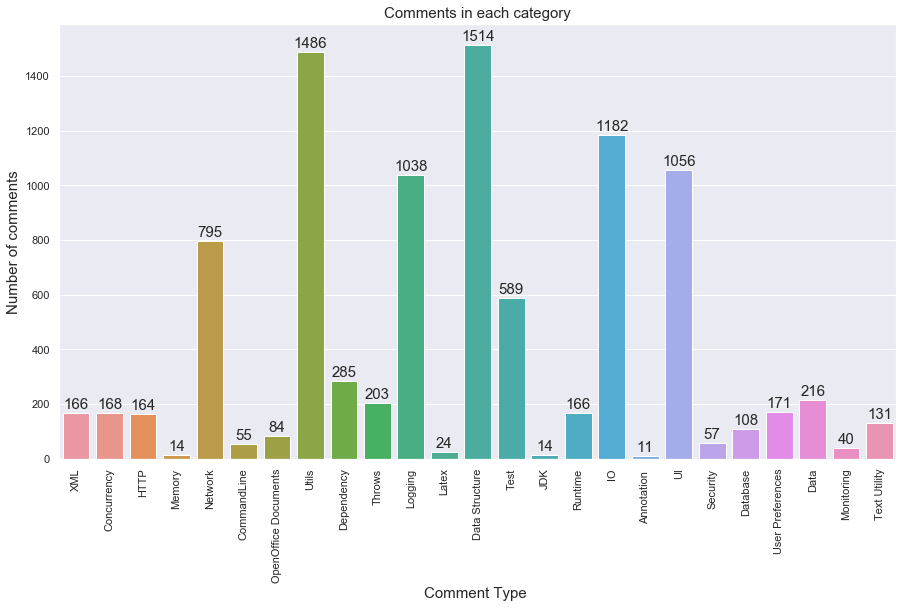

In [3]:
### Comments in each category


data_classes = pd.read_csv(binaryBodyTitle, header = 0)

data_classes["titleBody"] = data_classes["Title"] + data_classes["Body"]
data_classes = data_classes.drop('Title', 1)
data_classes = data_classes.drop('Body', 1)

columnsTitles = ['pr', 'titleBody','XML',
 'Concurrency',
 'HTTP',
 'Memory',
 'Network',
 'CommandLine',
 'OpenOffice Documents',
 'Utils',
 'Dependency',
 'Throws',
 'Logging',
 'Latex',
 'Data Structure',
 'Test',
 'JDK',
 'Runtime',
 'IO',
 'Annotation ',
 'UI',
 'Security',
 'Database',
 'User Preferences',
 'Data',
 'Monitoring',
 'Text Utility']

#reordering the dataframe collumns to facilitate the plot
data_classes = data_classes.reindex(columns=columnsTitles)

categories = list(data_classes.iloc[:,2:])
sns.set(font_scale = 1)
plt.figure(figsize=(15,8))


ax=sns.barplot(categories, data_classes.iloc[:,2:].sum().values)
plt.title("Comments in each category", fontsize=15)
plt.ylabel('Number of comments', fontsize=15)
plt.xlabel('Comment Type ', fontsize=15)
plt.xticks(rotation=90)
#adding the text labels
rects = ax.patches
labels = data_classes.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=15)
plt.show()


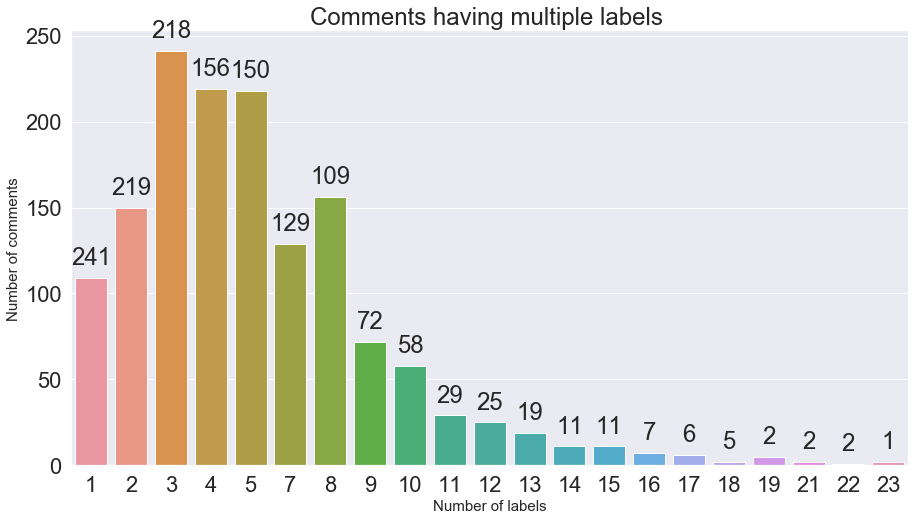

In [4]:
### Comments having multiple labels

rowSums = data_classes.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=15)
plt.xlabel('Number of labels', fontsize=15)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [5]:
#We first convert the comments to lower-case 
#then use custom made functions to remove html-tags, punctuation and non-alphabetic characters from the TitleBody.

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

#function pra remover palavras com menos de 3 tokens

data_classes['titleBody'] = data_classes['titleBody'].str.lower()
data_classes['titleBody'] = data_classes['titleBody'].apply(cleanHtml)
data_classes['titleBody'] = data_classes['titleBody'].apply(cleanPunc)
data_classes['titleBody'] = data_classes['titleBody'].apply(keepAlpha)

data_classes



,pr,titleBody,XML,Concurrency,HTTP,Memory,Network,CommandLine,OpenOffice Documents,Utils,...,Runtime,IO,Annotation,UI,Security,Database,User Preferences,Data,Monitoring,Text Utility
0,1,new sorting export preferencesthis will add a ...,0,0,0,0,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
1,7,i have implemented features requested in tic...,0,0,0,0,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
2,10,try to fix some obvious bugs about groupshi al...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,11,bugfix for bug pubmed import brokenfound bug...,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,15,make un abbreviating journal titles also work ...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,5706,revert fix side pane not remembering positio...,0,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1738,5710,incrementa validacoes para o campo year verif...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1739,5715,fix springer fetcher tests change in cha...,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1740,5716,do not couple search position to sidebar width...,0,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [6]:
#### removing stopwords

stop_words = set(stopwords.words('english'))
stop_words.update(['pr','zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within','jabref','org','github','com','md','https','ad','changelog','','joelparkerhenderson','localizationupd',' localizationupd','localizationupd ','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the','Mr', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'])
#stop_words.update(['i', 'me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data_classes['titleBody'] = data_classes['titleBody'].apply(removeStopWords)

#removing words with less than 3 characters
#data_classes['titleBody'] = data_classes['titleBody'].str.findall('\w{3,}').str.join(' ')



In [7]:
#### applying stemmer stopwords

stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data_classes['titleBody'] = data_classes['titleBody'].apply(stemming)

In [8]:
#wordCloud 
#https://medium.com/towards-artificial-intelligence/understanding-multi-label-classification-model-and-accuracy-metrics-1b2a8e2648ca
#https://medium.com/towards-artificial-intelligence/multi-label-text-classification-using-scikit-multilearn-case-study-with-stackoverflow-questions-768cb487ad12

#setting mask image
#mask = np.array(Image.open(r'/Users/igorscaliantewiese/Downloads/Exemplo/experiment/panda.jpg'))
#plt.imshow(mask)
#plt.axis("off")

#summary = data_classes['titleBody']

#data['titleBody'] = data['titleBody'].apply(lambda x: str(x))

#all_summary = " ".join(s for s in summary)

# lower max_font_size, change the maximum number of word and lighten the background:

#creating wordcloud
#wordcloud = WordCloud(width=2000, height=1000,contour_color="black", max_words=10000,relative_scaling = 0, background_color = "white").generate(all_summary)
#image_colors = ImageColorGenerator(mask)
#plt.figure(figsize=[20,15])
#plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
#plt.axis("off")
#_=plt.show()

#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.margins(x=0, y=0)
#plt.show()

data_classes['titleBody']

0       new sort export preferencesthi add new file so...
1       implement featur request ticket user specifi a...
2       tri fix obvious bug groupshi upgrad found bug ...
3       bugfix bug pubm import brokenfound bug pubm me...
4       make un abbrevi journal titl work journaltitl ...
                              ...                        
1737    revert fix side pane rememb posit revert commi...
1738    incrementa validaco para campo year verifica s...
1739    fix springer fetcher test chang describ applic...
1740    coupl search posit sidebar width fix problem t...
1741    fix import current open libraryremov unnecessa...
Name: titleBody, Length: 1742, dtype: object

In [9]:
#TF-IDF
from sklearn.feature_extraction.text import CountVectorizer


#we need to text max_feature with 10, 20, 25, 50 
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range = configurationTFIDF, max_features=num_feature)

tf_idf_results = vectorizer.fit_transform(data_classes['titleBody'])

features = vectorizer.get_feature_names()

print(features)

scores = (tf_idf_results.toarray())
output_tf_idf = pd.DataFrame(scores)

output_tf_idf = pd.concat([data_classes['pr'], output_tf_idf], axis=1)
output_tf_idf.to_csv(tfIDFoutputFile, encoding='utf-8', header=False, index=False, sep=',')


# remove words occuring less than 5 times
#tfidf = TfidfVectorizer(min_df=5)
#you can also remove common words:

# remove words occuring in more than half the documents
#tfidf = TfidfVectorizer(max_df=0.5)
#you can also remove stopwords like this:


['aa aa html check', 'aa checkstyl checkstyl commit', 'ab ffee dab edfc', 'ab png chang describ', 'abbrevi journal name parallel', 'abil add server specif', 'abil format cleanup date', 'abil run arbitrari formatt', 'acm fetcher fix chang', 'action comment dependabot rebas', 'action entri editor work', 'ad abil add server', 'ad bigger ui chang', 'ad chang describ test', 'ad descript bigger ui', 'ad manual test chang', 'ad new keyboard shortcut', 'ad select deselect button', 'ad test case chang', 'add abil format cleanup', 'add dependabot enabl badg', 'add dialog show prefer', 'add export controlsfx control', 'add export javafx base', 'add export javafx control', 'add export javafx graphic', 'add extern applic select', 'add latex citat tab', 'add on webextens nativ', 'add open controlsfx control', 'add open javafx control', 'add option copi titl', 'add server specif connect', 'add simpl gui test', 'add subgroup edit group', 'add telemetri track everi', 'add test chang describ', 'add text

          term  frequency
0        chang       4216
1         help       2223
2         test       2218
3         issu       1897
4        creat       1710
5          run       1187
6           ad       1078
7          fix        941
8      describ        929
9        check        900
10      featur        897
11      manual        849
12          ui        838
13  screenshot        814
14      bigger        791
15      messag        788
16    document        773
17      commit        766
18        page        764
19      status        743
20         git        724
21      outdat        718
22       entri        588
23        file        523
24         use        502


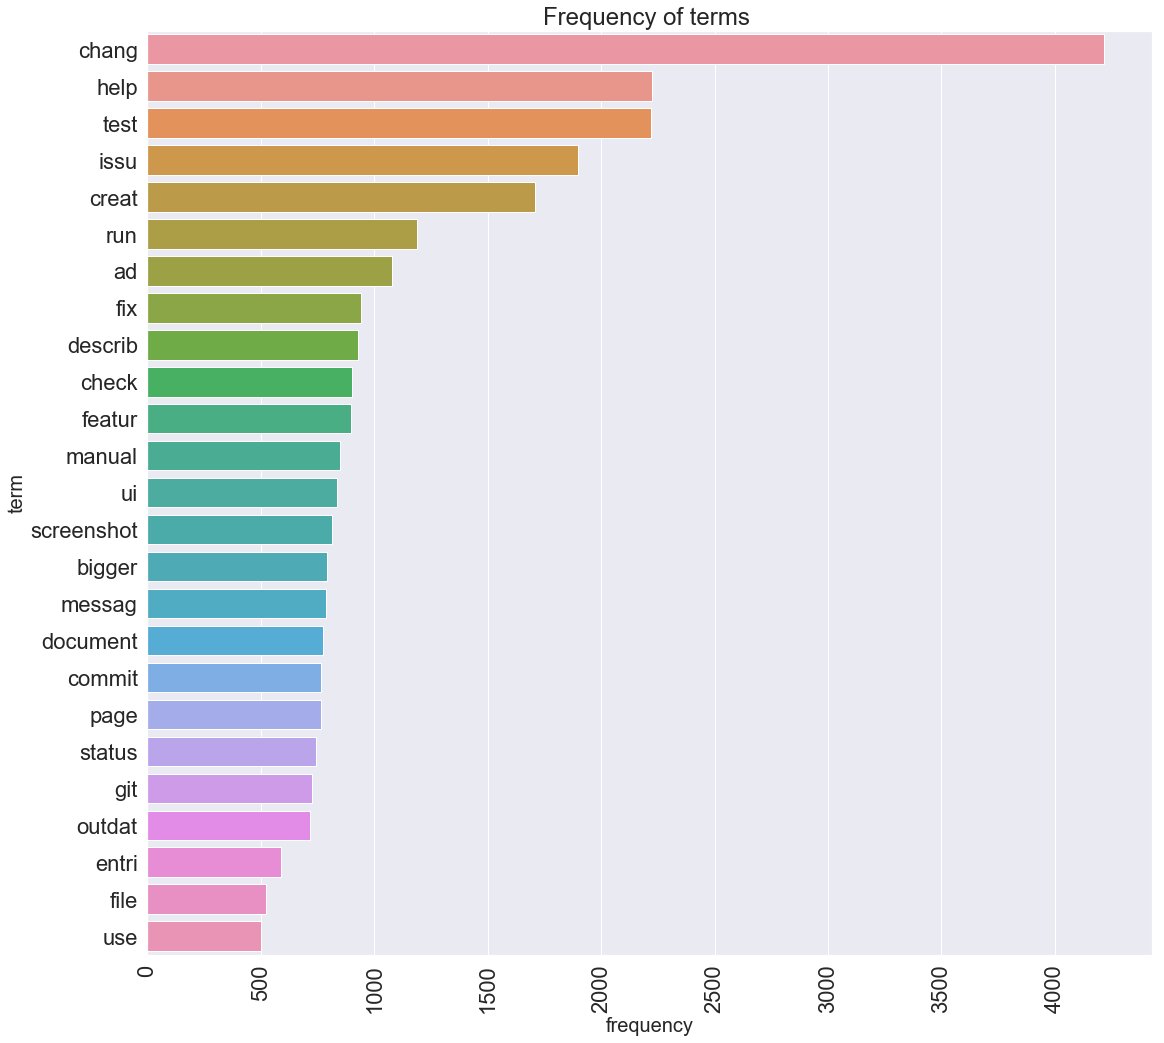

In [10]:
#analyzing frequency of TOP 50 terms

docs = data_classes['titleBody'].tolist()

cv = CountVectorizer()
cv_fit=cv.fit_transform(docs)

#print(cv.get_feature_names())
#print(cv_fit.toarray())

word_list = cv.get_feature_names()   

count_list = cv_fit.toarray().sum(axis=0)
term_frequency = dict(zip(word_list,count_list))

a = sorted(term_frequency.items(), key=lambda x: x[1], reverse=True) 

top50 = a[:25]
df_frequency = pd.DataFrame(top50, columns =['term', 'frequency'])  

print(df_frequency)

df_frequency.to_csv(termFrequencyTop50, encoding='utf-8', header=False, index=False, sep=',')

sns.set(font_scale = 2)
plt.figure(figsize=(18,17))
plt.xticks(rotation=90)
plt.title("Frequency of terms ")
plt.ylabel('term', fontsize=20)
plt.xlabel('frequency', fontsize=20)
ax = sns.barplot(x="frequency", y="term", data=df_frequency)

In [11]:
#feature selection
#select best TF-IDF features to compose the model


In [12]:
#Refactoring the number of labels to predict --- Testing stratified

data = pd.read_csv(tfIDFoutputFile,sep=',',header=None,index_col=0)
classes = pd.read_csv(binaryBodyTitle, sep=',',index_col='pr')


#del classes['pr']
del classes['Title']
del classes['Body']


classesTest = classes
del classesTest['Concurrency']
del classesTest['HTTP']
del classesTest['Memory']
del classesTest['CommandLine']
del classesTest['OpenOffice Documents']
del classesTest['XML']
del classesTest['Dependency']
del classesTest['Latex']
del classesTest['Annotation ']
del classesTest['JDK']
del classesTest['Security']
del classesTest['Text Utility']
del classesTest['Data']
del classesTest['Monitoring']
del classesTest['User Preferences']

classesTest.to_csv('./experiment/classes_removed.csv')


#classesTest=classesTest.iloc[:,1:].values

categories = classesTest.columns.values.tolist()

#http://scikit.ml/stratification.html
#http://lpis.csd.auth.gr/publications/sechidis-ecmlpkdd-2011.pdf
#from skmultilearn.model_selection import iterative_train_test_split
#X_train, y_train, X_test, y_test = iterative_train_test_split(data, classesTest, test_size = 0.5)



In [13]:
#resampling methods

#Cross-Validation stratified to keep the class proportion  (K=5 and k=10)
#bootstrapping?

#Hold-Out 75/25
#train, test = train_test_split(data_classes, random_state=42, test_size=0.30, shuffle=False)

data = pd.read_csv(tfIDFoutputFile,sep=',',header=None,index_col=0)
classes = pd.read_csv(binaryBodyTitle, sep=',',index_col='pr')


#del classes['pr']
del classes['Title']
del classes['Body']

#print(type(classesTest))
categories = classes.columns.values.tolist()

#stratify=y, if shuffle=True
X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size=size_test, random_state=9)


In [14]:
#build the model 
# Binary Relevancy vs. Classifier Chair 
#using the algorithms: SMO (SVM version to multilabel), RandonForest, GausianNB, MLP, DecisionTree, ML-KNN, LogisticRegression

#cls = [data[0].split('-') for data in classes.values]
#mlb = MultiLabelBinarizer()
#cls = mlb.fit_transform(cls)
#classes = pd.DataFrame(cls,index=classes.index)

#https://towardsdatascience.com/journey-to-the-center-of-multi-label20-classification-384c40229bff
#https://medium.com/towards-artificial-intelligence/multi-label-text-classification-using-scikit-multilearn-case-study-with-stackoverflow-questions-768cb487ad12
#http://scikit.ml/modelselection.html

#https://xang1234.github.io/multi-label/ -Olhar esse aaqui

#types permitted:
#RandomForest
#RidgeClassifierCV
#GaussianNB
#LinearSVC
#DecisionTree
#LogisticRegression
#MLPClassifier
#BRkNNaClassifier
#MLkNN


ids = y_test.index


if test_type == "DecisionTree":
    clf = BinaryRelevance(classifier=DecisionTreeClassifier(), require_dense = [False, True])
if test_type == "LogisticRegression":
    clf = BinaryRelevance(classifier=LogisticRegression(random_state=0), require_dense = [False, True])
if test_type == "RandomForest": 
    clf = BinaryRelevance(classifier=RandomForestClassifier(criterion='entropy',max_depth= 50, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 50), require_dense = [False, True])
if test_type == "MLPClassifier":
    clf = BinaryRelevance(classifier=MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1), require_dense = [False, True])
if test_type == "MLkNN":
    clf = BinaryRelevance(MLkNN(k=3))

#This three works without probability
if test_type == "LinearSVC":
    clf = BinaryRelevance(classifier=LinearSVC(), require_dense = [False, True])
if test_type == "GaussianNB":
    clf = BinaryRelevance(classifier=GaussianNB(), require_dense = [False, True])
if test_type == "RidgeClassifierCV":
    clf = BinaryRelevance(classifier=RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]), require_dense = [False, True]) 
if test_type == "BRkNNaClassifier":
    clf = BinaryRelevance(BRkNNaClassifier(k=3))


clf.fit(X_train,y_train)

#
predict = clf.predict(X_test).toarray()
probability = clf.predict_proba(X_test).toarray()

#using categorie because I got the name of the skills before and save into this variable
predictions = pd.DataFrame(predict, index=ids, columns=categories) # with header
probabilities = pd.DataFrame(probability, index=ids, columns=categories) # with header

predictions.to_csv(predictions_result)
probabilities.to_csv(probabilities_result)


In [15]:

#Evaluation Metrics
#Confusion Matrix per Class, Precision, Recall, F-Score, AUCpr, HammingLoss, Jaccard, AccuracyScore

#paper with metrics
#https://ieeexplore.ieee.org/document/6471714
#https://stats.stackexchange.com/questions/21551/how-to-compute-precision-recall-for-multiclass-multilabel-classification
#https://stats.stackexchange.com/questions/233275/multilabel-classification-metrics-on-scikit

#predictions = pd.read_csv('/Users/igorscaliantewiese/Downloads/Exemplo/experiment/predict_file_1x1NBS.csv',header=0,dtype=int,index_col=0)
y_pred = predictions.values
#probabilities = pd.read_csv('/Users/igorscaliantewiese/Downloads/Exemplo/experiment/probability_file_1x1NBS.csv',header=0,dtype=float,index_col=0)
y_proba = probabilities.values

#receiving the y_test true value from each pull request
y_true = y_test.to_numpy()
    
#In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
print("Accuracy Score")
acc_ml = accuracy_score(y_true, y_pred)
print(acc_ml)

print("---------")
print("")

#Se eu entendi bem.. quer dizer que "cravamos 2 dos 404 instancias exatamente com os mesmos labels
print("Accuracy Score not normalized")
acc_score = accuracy_score(y_true, y_pred, normalize=False)
print(acc_score)

print("---------")
print("")


#Zero one loss é se vc acertou todos as classes que tinham que estar em um teste. Veja que o percentual dele é inversamente 
#proporcional ao accuracy Score
print("zero_one_loss")
zeroOne = zero_one_loss(y_true, y_pred)
print(zeroOne)

print("---------")
print("")

#F1-Score
print("Fmeasure Score")
fmeasure_score = f1_score(y_true,y_pred, average='micro')
#fmeasure_score = f1_score(y_true,y_pred, average='macro')
print(fmeasure_score)

print("---------")
print("")


#AUC-PR
print("AUC-PR")
pr_score = average_precision_score(y_true,y_proba,average='micro')
print(pr_score)
#pr_score = average_precision_score(y_true,y_proba,average='macro')

print("---------")
print("")


#https://stats.stackexchange.com/questions/336820/what-is-a-hamming-loss-will-we-consider-it-for-an-imbalanced-binary-classifier
print("hamming loss average")
#se eu interpretei certo, quer dizer que temos 21% de perda. Logo, 79% accuracy
hamming_loss = skm.hamming_loss(y_true, y_pred)
print(hamming_loss)

print("---------")
print("")


#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score
#compara os vetores de labels de entrada e saída

print("Jaccard samples")
jaccard_score_samples = jaccard_score(y_true, y_pred, average='samples')
print(jaccard_score_samples)

print("---------")
print("")


print("Jaccard macro")
jaccard_macro = jaccard_score(y_true, y_pred, average='micro')
print(jaccard_macro)
#jaccard_score(y_true, y_pred, average=None)

print("---------")
print("")

#arr = [acc_ml,acc_score,fmeasure_score,pr_score]
#columns = ['Accuracy','Acc-Score','zero_one_loss','hamming loss average','Jaccard samples','Jaccard macro','F-score','Precision']
#print(arr)

#df_metrics1 = pd.DataFrame([arr],columns=columns)
#print(df_metrics1)



Accuracy Score
0.0745697896749522
---------

Accuracy Score not normalized
39
---------

zero_one_loss
0.9254302103250478
---------

Fmeasure Score
0.6924700914848698
---------

AUC-PR
0.7007395674342972
---------

hamming loss average
0.1336902485659656
---------

Jaccard samples
0.5397482597363908
---------

Jaccard macro
0.5296017222820237
---------



Average precision score, micro-averaged over all classes: 0.70


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.70')

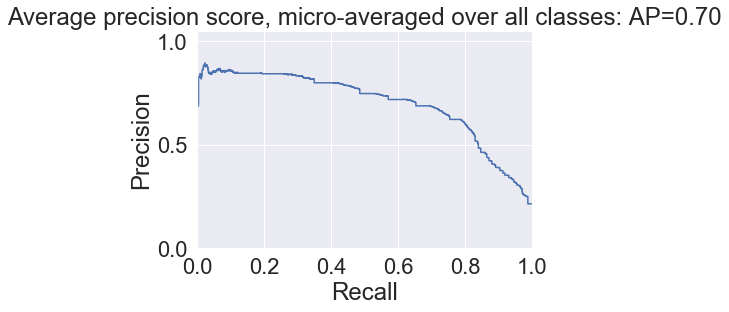

In [16]:

# For each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = y_test.shape[1]

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], probability[:, i])
    average_precision[i] = average_precision_score(y_true[:, i], probability[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true.ravel(),probability.ravel())

average_precision["micro"] = average_precision_score(y_true, probability, average="micro")

print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))


plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))


In [17]:
line=[] 
# line to csv report file

names = ['Annotation',
 'CommandLine',
 'Concurrency',
 'Data',
 'Data Structure',
 'Database',
 'Dependency',
 'HTTP',
 'IO',
 'JDK',
 'Latex',
 'Logging',
 'Memory',
 'Monitoring',
 'Network',
 'OpenOffice Documents',
 'Runtime',
 'Security',
 'Test',
 'Text Utility',
 'Throws',
 'UI',
 'User Preferences',
 'Utils',
 'XML']

#average='micro'
#print("Testing Precision_Recall")
#x = precision_recall_fscore_support(y_true, y_pred, average = 'micro')
#print(x)
prec, rec, fscore, sup = precision_recall_fscore_support(y_true,y_pred, average='micro')


arr = [acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro,pr_score,rec, fscore]
columns = ['Accuracy','Acc-Score','zero_one_loss','AUC-PR','hamming loss average','Jaccard samples','Jaccard macro','Precision','Recall','Fmeasure']
#print(arr)

#df_metrics1 = pd.DataFrame([arr],columns=columns)
#print(df_metrics1)

#Precision, recall, f_score, support

#columns2 = []
#arr2 = [prec, rec, fscore]
df_metrics2 = pd.DataFrame([arr],columns=columns)
print(df_metrics2)

print("---------")
print("")

x = precision_recall_fscore_support(y_true,y_pred, average=None)
#print(x)
print("")
print("")

df_metrics_by_class = pd.DataFrame.from_records(x, columns=names, index=['precision','recall','f-measure','samples_tested'])
print(df_metrics_by_class)

print("---------")
print("")

df_metrics2.to_csv(modelMatrix, encoding='utf-8', header=True, index=False, sep=',')    

df_metrics_by_class.to_csv(metrics_by_class, encoding='utf-8', header=True, index=False, sep=',')    

dataLine = ""
dataLine = "tf-IDFMin, tf-IDFMax, #_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss, AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score"
line.append((dataLine))
dataLine =  str(configurationTFIDF) + "," + str(num_feature) + "," + stop_word + "," + str(size_test) + "," + str(test_type) + "," + str(acc_ml) + ","+ str(acc_score) + ","+ str(zeroOne) + "," + str(pr_score) + ","+ str(hamming_loss) + ","+ str(jaccard_score_samples) + ","+ str(jaccard_macro)+"," + str(prec)+","+str(rec)+","+str(fscore) 
#dataLine = dataLine + "," + str(x)
#dataLine = str(configurationTFIDF)+" "+ str(configurationTFIDFMax) + "," + str(num_feature) + "," + stop_word+ "," + str(size_test) + "," + str(test_type) + "," + acc_ml
#print(dataLine)
line.append((dataLine))
print(line)




#metrics = pd.DataFrame(line, columns = ['label','TN','FP','FN','TP'])
metrics = pd.DataFrame(line)
metrics.to_csv('./experiment/report'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv', encoding='utf-8', header=False, index=False, sep=',')    
np.savetxt(r'./experiment/report'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.txt', metrics.values, fmt='%s', delimiter=',')



   Accuracy  Acc-Score  zero_one_loss   AUC-PR  hamming loss average  \
0   0.07457         39        0.92543  0.70074               0.13369   

   Jaccard samples  Jaccard macro  Precision    Recall  Fmeasure  
0         0.539748       0.529602    0.70074  0.700855   0.69247  
---------



                Annotation  CommandLine  Concurrency  Data  Data Structure  \
precision              0.0     1.000000          0.0   0.0        0.457726   
recall                 0.0     0.020000          0.0   0.0        0.691630   
f-measure              0.0     0.039216          0.0   0.0        0.550877   
samples_tested        37.0    50.000000         38.0   2.0      227.000000   

                Database  Dependency        HTTP         IO        JDK  ...  \
precision            0.0         0.0    0.849421   0.250000   0.200000  ...   
recall               0.0         0.0    0.997732   0.032258   0.023256  ...   
f-measure            0.0         0.0    0.917623   0.057143   0.041667  ...   
s

In [18]:
import datetime
now = datetime.datetime.now()

reportData = pd.read_csv(report,sep=',')
reporttxt = pd.read_csv(reportText, sep=',')
templateData = pd.read_csv(template, sep=',')

print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))
headerdf = ['date_time','tf-IDF', '#_TopTerms','Stop_Word','Train/Test_Size','Algorithm','Accuracy_Score',
            'Accuracy_Score_not_normalized','zero_one_loss', 'AUC-PR','hamming_loss_avg','Jaccard_samples',
            'Jaccard_macro','Precision','Recall','Fmeasure_Score']


tup = ( now,str(configurationTFIDF) ,str(num_feature) , stop_word , str(size_test) , str(test_type) , str(acc_ml) , 
       str(acc_score) , str(zeroOne) , str(pr_score) , str(hamming_loss) , str(jaccard_score_samples) , 
       str(jaccard_macro) , str(prec) , str(rec) , str(fscore) )

print("tupla:", tup)
print(len(tup))

list_tup  = [ now,str(configurationTFIDF) ,str(num_feature) , stop_word , str(size_test) , str(test_type) , str(acc_ml) , 
       str(acc_score) , str(zeroOne) , str(pr_score) , str(hamming_loss) , str(jaccard_score_samples) , 
       str(jaccard_macro) , str(prec) , str(rec) , str(fscore) ]

#reportData.append(metrics, ignore_index=True)
#reporttxt.append(metrics, ignore_index=True)

#reportData.to_csv('./experiment/report.csv', encoding='utf-8', header=False, index=False, sep=',')    
#np.savetxt(r'./experiment/report.txt', reporttxt.values, fmt='%s', delimiter=',')


dfTeste = pd.DataFrame.from_records(data=[tup], columns=[headerdf])
#dfTeste.append(templateData, ignore_index=True)
#dfTeste = pd.concat([dfTeste, templateData],axis=0)
#listTup = []
#listTup.append(tup)
#templateData = templateData.append(dfTeste.iloc[0] , ignore_index=True)
#templateData = templateData.append(pd.Series(dfTeste.iloc[0],index=templateData.columns) , ignore_index=True)

data_list = templateData.values.tolist()
data_list.append(list_tup)
new_data = pd.DataFrame(data_list)  
for row in templateData.itertuples():
    print(row)
    
#dfTeste.to_csv('./experiment/dfTeste.csv', encoding='utf-8', index=False, sep=',')    
new_data.to_csv('./experiment/dfTeste.csv', encoding='utf-8', index=False, sep=',', header=headerdf)  

Current date and time : 
2020-04-10 01:10:12
tupla: (datetime.datetime(2020, 4, 10, 1, 10, 12, 712649), '(4, 4)', '5000', 'Yes', '0.3', 'RandomForest', '0.0745697896749522', '39', '0.9254302103250478', '0.7007395674342972', '0.1336902485659656', '0.5397482597363908', '0.5296017222820237', '0.6842837273991655', '0.7008547008547008', '0.6924700914848698')
16
Pandas(Index=0, date_time='2020-04-10 00:19:28.270796', _2='(1, 1)', _3=25, Stop_Word='Yes', _5=0.2, Algorithm='RandomForest', Accuracy_Score=0.07449856733524356, Accuracy_Score_not_normalized=26, zero_one_loss=0.9255014326647564, _10=0.7120981772225444, hamming_loss_avg=0.13363896848137535, Jaccard_samples=0.5249025505736409, Jaccard_macro=0.515378221113882, Precision=0.7213496218731821, Recall=0.6434872859366891, Fmeasure_Score=0.6801974766867801)
Pandas(Index=1, date_time='2020-04-10 00:22:37.282674', _2='(1, 1)', _3=50, Stop_Word='Yes', _5=0.2, Algorithm='RandomForest', Accuracy_Score=0.04297994269340974, Accuracy_Score_not_norma

In [19]:
#general = [0,1,2,3,4,5,6,7,8,9]

#TN,FP,FN,TP
#fn = existia e vc nao falou
#fp = vc falou que tinha, mas não existia

data = multilabel_confusion_matrix(y_true, y_pred)
#data = multilabel_confusion_matrix(y_true, y_pred,labels=general)

labels = ['Annotation',
 'CommandLine',
 'Concurrency',
 'Data',
 'Data Structure',
 'Database',
 'Dependency',
 'HTTP',
 'IO',
 'JDK',
 'Latex',
 'Logging',
 'Memory',
 'Monitoring',
 'Network',
 'OpenOffice Documents',
 'Runtime',
 'Security',
 'Test',
 'Text Utility',
 'Throws',
 'UI',
 'User Preferences',
 'Utils',
 'XML']
line = []
#metrics = pd.DataFrame(pd.np.empty((0, 5)))  
for i in range (25):
    row = data[i]
    
    #line.append(label(i))
    dataLine=""
    dataLine = labels[i] 
    for x in np.nditer(row):
        dataLine = dataLine + "," + str(x)
        #print(dataLine)
    line.append((dataLine))
#print(line)
metrics = pd.DataFrame(line)

np.savetxt(r'./experiment/metrics'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.txt', metrics.values, fmt='%s', delimiter=',')

confusion_matrix = pd.read_csv('./experiment/metrics'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.txt', sep=',')

confusion_matrix.columns = ['Class','TN','FP','FN','TP']
confusion_matrix.to_csv(confusionMatrix, encoding='utf-8', header=True, index=False, sep=',')    

print(confusion_matrix)


                   Class   TN   FP   FN   TP
0            CommandLine  473    0   49    1
1            Concurrency  481    4   38    0
2                   Data  521    0    2    0
3         Data Structure  110  186   70  157
4               Database  505    2   16    0
5             Dependency  501    0   22    0
6                   HTTP    4   78    1  440
7                     IO  421    9   90    3
8                    JDK  476    4   42    1
9                  Latex   23  187   31  282
10               Logging  518    0    5    0
11                Memory    2   75    4  442
12            Monitoring  326   22  162   13
13               Network  520    0    3    0
14  OpenOffice Documents  470    1   52    0
15               Runtime   14  157   18  334
16              Security  521    0    2    0
17                  Test   27  172   30  294
18          Text Utility  511    0   12    0
19                Throws  489    2   32    0
20                    UI  481    3   38    1
21      Us

In [20]:
#to inspect the differences btw y_true and y_predict

#y = y_true == 1
#y_t = [[index for index, value in enumerate(data) if value == 1] for data in y_true]
#y_p = [[index for index, value in enumerate(data) if value == 1] for data in y_pred]

#print(y_t)
#print(y_p)